<a href="https://colab.research.google.com/github/rutujas11/Machine-Learning-Models/blob/main/under_and_Overfitting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot

In [ ]:
X,y = make_classification(n_samples = 9000, n_features = 18,n_informative = 4, n_redundant = 12,random_state = 4)

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3)

In [ ]:
train_scores,test_scores = list(), list()

In [ ]:
values = [i for i in range(1,21)]

In [ ]:
for i in values:
  model = DecisionTreeClassifier()
  model.fit(X_train,y_train)
  train_yhat = model.predict(X_train)
  train_acc = accuracy_score(y_train,train_yhat)
  test_yhat = model.predict(X_test)
  test_acc = accuracy_score(y_test,test_yhat)
  train_scores.append(train_acc)
  test_scores.append(test_acc)
  print('>%d, train: %.3f, test: %.3f' % (i,train_acc, test_acc))

>1, train: 1.000, test: 0.938
>2, train: 1.000, test: 0.939
>3, train: 1.000, test: 0.939
>4, train: 1.000, test: 0.935
>5, train: 1.000, test: 0.935
>6, train: 1.000, test: 0.941
>7, train: 1.000, test: 0.939
>8, train: 1.000, test: 0.938
>9, train: 1.000, test: 0.936
>10, train: 1.000, test: 0.934
>11, train: 1.000, test: 0.940
>12, train: 1.000, test: 0.940
>13, train: 1.000, test: 0.940
>14, train: 1.000, test: 0.944
>15, train: 1.000, test: 0.939
>16, train: 1.000, test: 0.939
>17, train: 1.000, test: 0.938
>18, train: 1.000, test: 0.943
>19, train: 1.000, test: 0.940
>20, train: 1.000, test: 0.939


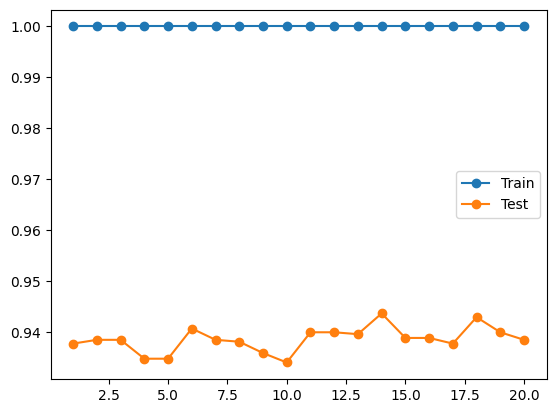

In [ ]:
pyplot.plot(values,train_scores,'-o',label = 'Train')
pyplot.plot(values,test_scores,'-o',label = 'Test')
pyplot.legend()
pyplot.show()

### in above graph we can see on training data model isgiving 100% acccuracy but for test it is only around 93%(i.e poorly working on test). Therefore it is overfitting. to prevent this we will use Cross-validation.

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid = {'criterion' : ['gini','entropy'], 'max_depth' : [2,4,6,10,20],'min_samples_split': [5,10,20,50,100]}
clf = GridSearchCV(DecisionTreeClassifier(),param_grid, cv=3, n_jobs = -1, scoring = 'accuracy')
clf.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 10, 20],
                         'min_samples_split': [5, 10, 20, 50, 100]},
             scoring='accuracy')

In [ ]:
clf.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_split=20)

In [ ]:
print(accuracy_score(y_train, clf.best_estimator_.predict(X_train)))
print(accuracy_score(y_test, clf.best_estimator_.predict(X_test)))

0.9603174603174603
0.9359259259259259
